***1. Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.***


**1.1 Preparação e Transformação dos dados**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [94]:
#Abrir o EFIplus_medit
data = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")
print(data.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
0                0              1             0  ...                     0   
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3                1              1             1  ...                     0   
4                1              1             1  ...                     0   

   Squalius pyrenaicus  Squalius torgalensis

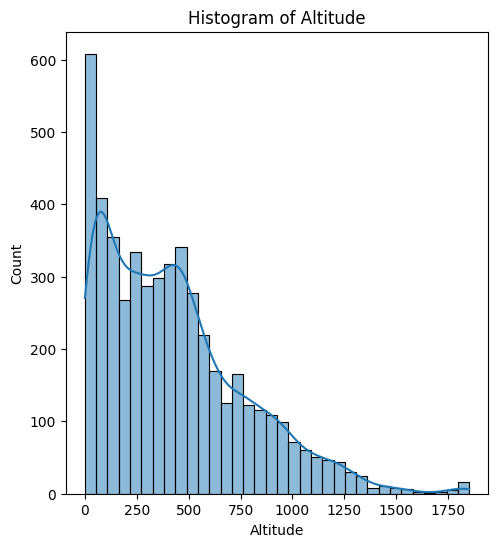

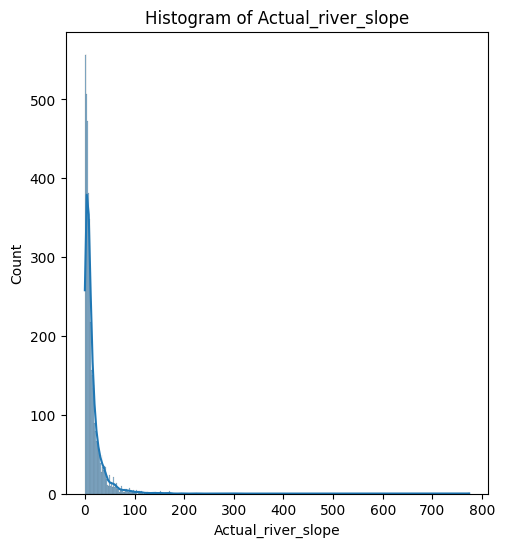

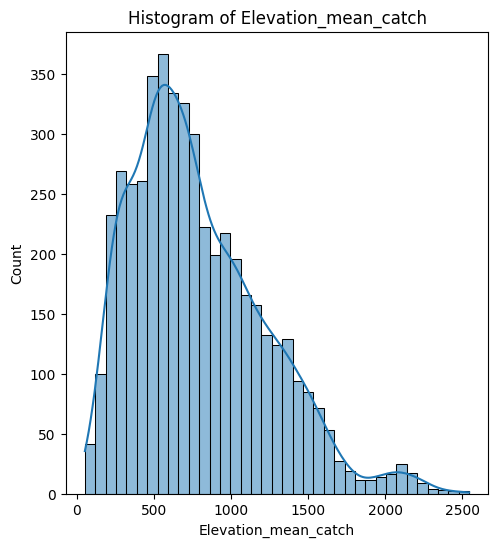

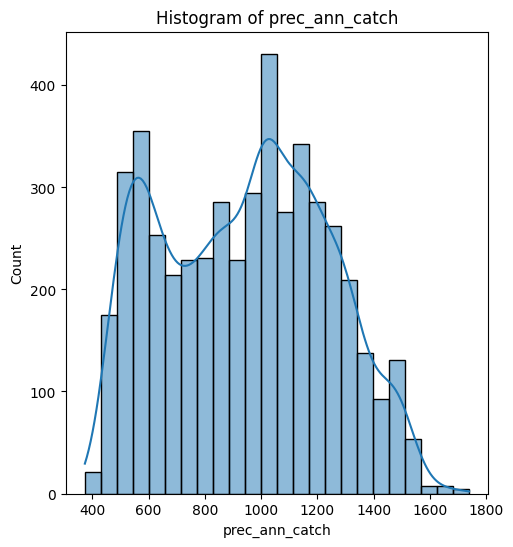

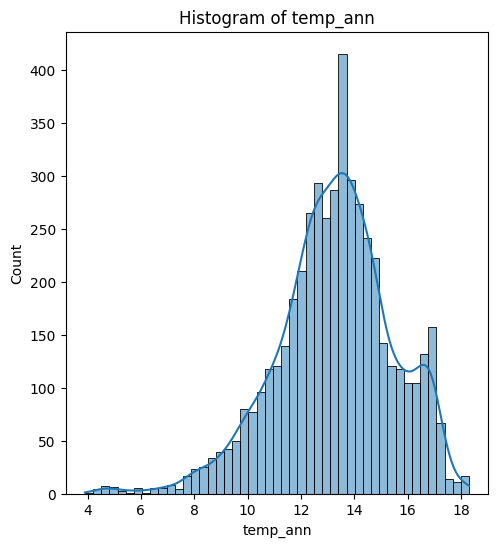

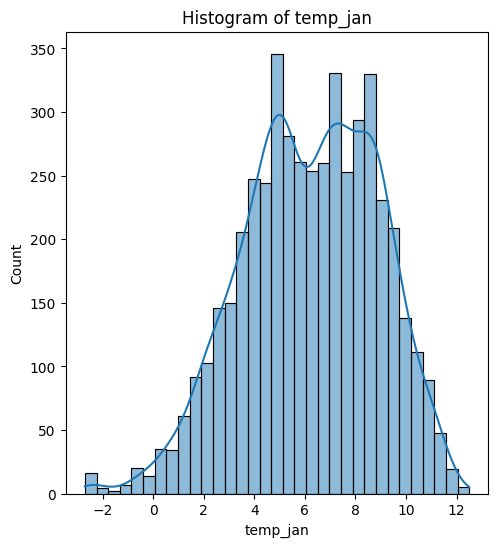

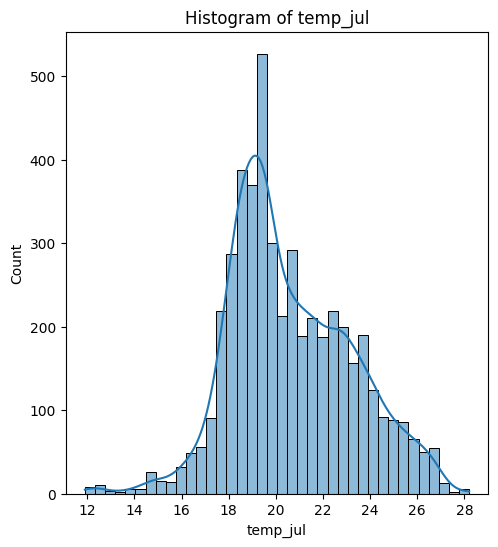

In [95]:
# Função para o histograma 
def plot_hist(variable):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    
    plt.show()

    # Variáveis 
for var in ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']:
    plot_hist(var)

In [96]:
# Colunas das espécies 
species_columns = data.columns[data.columns.get_loc('Abramis brama'):]

# Cálculo da species richness
data['Species_Richness'] = data[species_columns].sum(axis=1)

# Mostrar apenas a coluna Species richness
print(data['Species_Richness'])

# Mostrar a estatistica descritiva apenas da coluna Species richness 
print(data['Species_Richness'].describe())

0       1
1       1
2       1
3       2
4       2
       ..
5006    5
5007    7
5008    6
5009    1
5010    6
Name: Species_Richness, Length: 5011, dtype: int64
count    5011.000000
mean        3.508481
std         2.879080
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        29.000000
Name: Species_Richness, dtype: float64


*Perform Simple Linear Regression*

In [97]:
# Verificando valores em falta no dataset 
print(data.isnull().sum())


Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Species_Richness        0
Length: 165, dtype: int64


In [98]:
# Definindo a coluna para species richness
species_richness_column = 'Species_Richness'

# Definindo a lista das variaveis 
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Removendo os valores em falta da coluna 
data_cleaned = data.dropna(subset=[species_richness_column] + variables)


In [102]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

results = {}

for var in variables:
    # Preparando os dados para a regressão
    X = data_cleaned[var]
    y = data_cleaned[species_richness_column]
    
    # Adicionando um termo constante para a interceptação
    X = sm.add_constant(X)
    
    # Ajuste do modelo de regressão
    model = sm.OLS(y, X).fit()
    
    # Guardar os resultados 
    results[var] = model
    
    #Mostra os resultados da regressão do modelo 
    print(f'Regression results for {var}:\n')
    print(model.summary())


Regression results for Altitude:

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     509.7
Date:                Sat, 18 May 2024   Prob (F-statistic):          2.35e-107
Time:                        10:39:23   Log-Likelihood:                -11653.
No. Observations:                4819   AIC:                         2.331e+04
Df Residuals:                    4817   BIC:                         2.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5

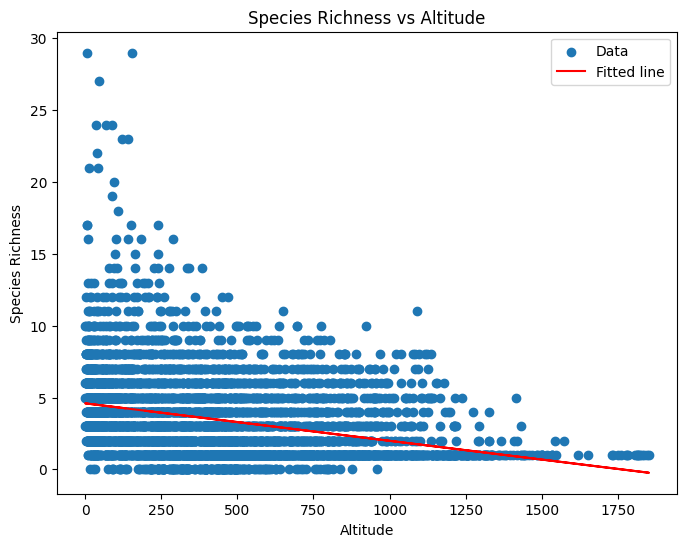

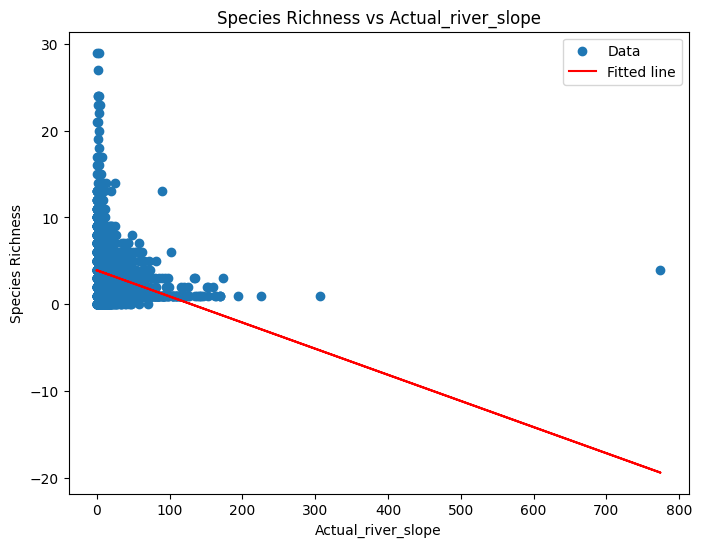

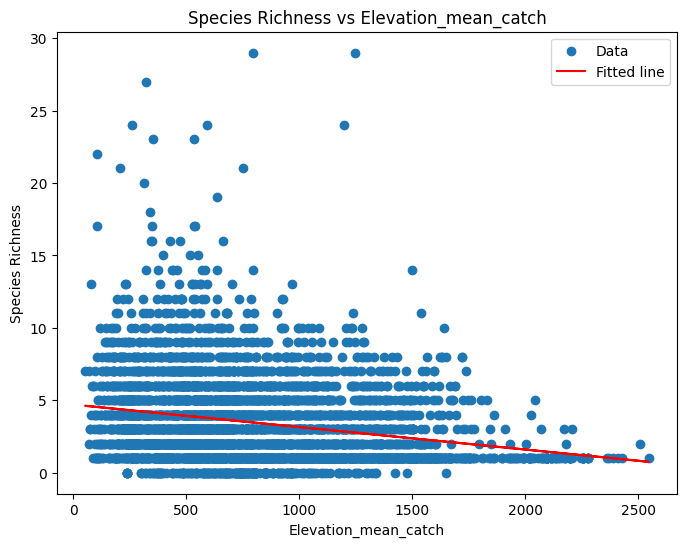

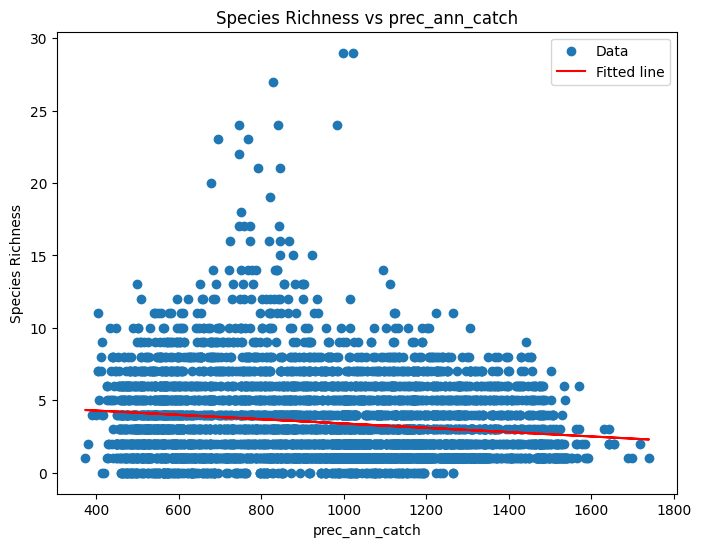

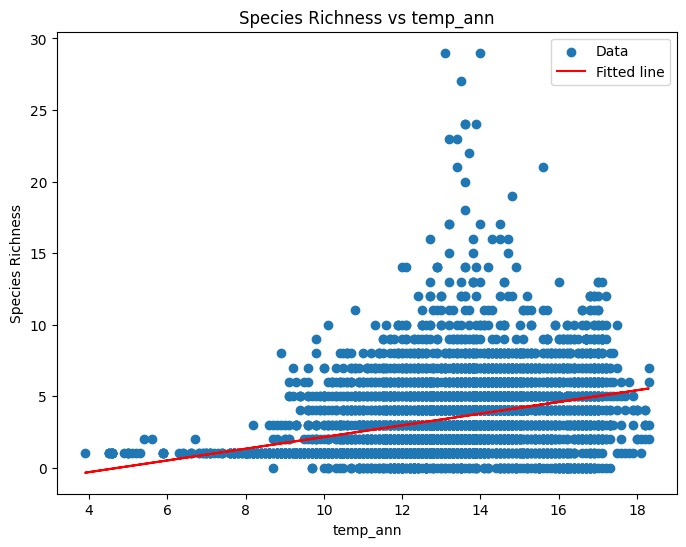

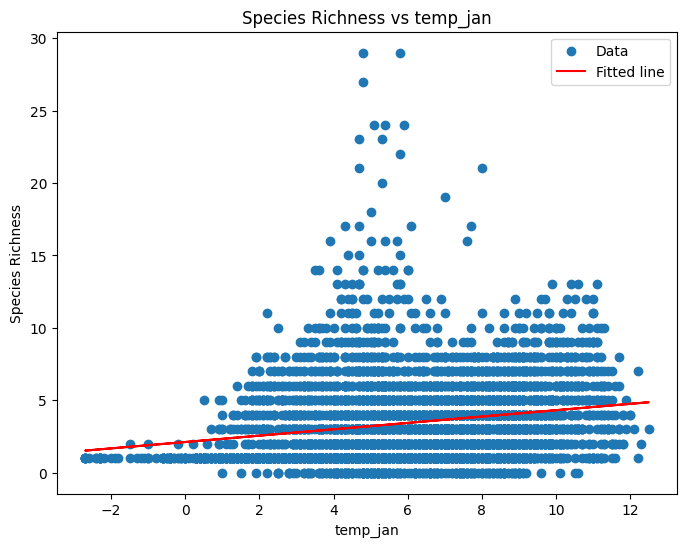

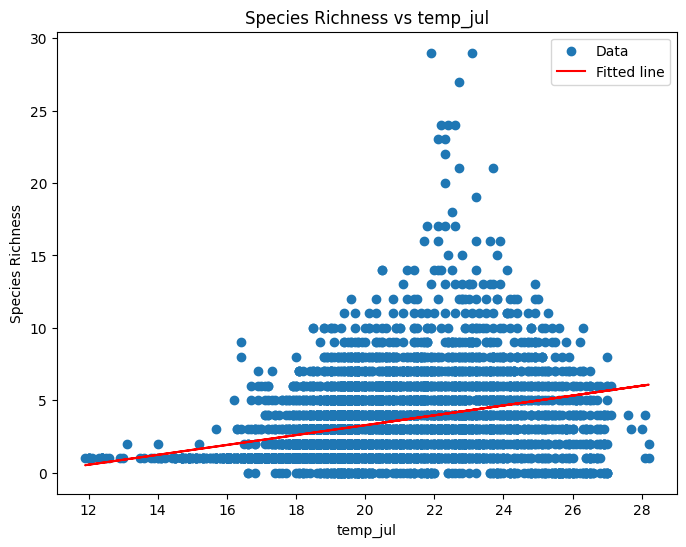

In [101]:
for var in variables:
    X = data_cleaned[var]
    y = data_cleaned[species_richness_column]
    
    # Criando novamento o modelos para obter previsões
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    predictions = model.predict(X_const)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, predictions, color='red', label='Fitted line')
    plt.xlabel(var)
    plt.ylabel('Species Richness')
    plt.title(f'Species Richness vs {var}')
    plt.legend()
    plt.show()

***2. Now try to run a multiple linear regression with the same data and check the differences between the
previous univariate regression coefficients and the new coefficients. Plot the partial dependence plots
to compare responses with the previous single effects.***


In [104]:
# Preparação dos dados para regressão multipla
X = data_cleaned[variables]
y = data_cleaned[species_richness_column]


# Adicionando um termo constante para a interceptação
X = sm.add_constant(X)

# Ajustando o modelo da regressão linear múltipla 
multiple_model = sm.OLS(y, X).fit()

# Mostrando as estatisticas do modelo de regressão linear múltipla 
print(multiple_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sat, 18 May 2024   Prob (F-statistic):          4.90e-213
Time:                        10:41:44   Log-Likelihood:                -11391.
No. Observations:                4819   AIC:                         2.280e+04
Df Residuals:                    4811   BIC:                         2.285e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8252 

In [106]:
# Guardando os coeficeintes da regressão linear multipla 
multiple_coefficients = multiple_model.params

# Mostra os coeficientes de regressão univariados e múltiplos para comparação
print("Variable\tUnivariate Coef\tMultiple Coef")
for var in variables:
    univariate_coef = results[var].params[var]
    multiple_coef = multiple_coefficients[var]
    print(f"{var}\t{univariate_coef:.4f}\t\t{multiple_coef:.4f}")


Variable	Univariate Coef	Multiple Coef
Altitude	-0.0026		-0.0048
Actual_river_slope	-0.0301		-0.0169
Elevation_mean_catch	-0.0016		-0.0000
prec_ann_catch	-0.0015		-0.0000
temp_ann	0.4088		-0.1206
temp_jan	0.2198		-0.3951
temp_jul	0.3410		0.2952


***3. Check the multicolinearity among the predictor variables and run a second more parsimonious
regression model. Check how the coefficients have changed.***

3.1 Calculo do VIF para cada variavel 


In [108]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Variable'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF for the predictor variables
vif_data = calculate_vif(data_cleaned[variables])
print(vif_data)


               Variable          VIF
0              Altitude    15.478846
1    Actual_river_slope     1.602971
2  Elevation_mean_catch    22.313407
3        prec_ann_catch    14.290697
4              temp_ann  2357.117893
5              temp_jan   175.527484
6              temp_jul  1365.635413


3.2 Parsimonious Model

In [111]:
# Definindo o limite para o VIF
vif_threshold = 5

# Identificando variáveis ​​com VIF maior que o limite
high_vif_vars = vif_data[vif_data['VIF'] > vif_threshold]['Variable'].tolist()

# Criando um novo conjunto de variáveis ​​excluindo aquelas com VIF alto
parsimonious_variables = [var for var in variables if var not in high_vif_vars]

# Ajustar o modelo de regressão parsimonious
X_parsimonious = data_cleaned[parsimonious_variables]
X_parsimonious = sm.add_constant(X_parsimonious)
parsimonious_model = sm.OLS(y, X_parsimonious).fit()

# Mostranto os valores
print(parsimonious_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     289.6
Date:                Sat, 18 May 2024   Prob (F-statistic):           4.11e-63
Time:                        10:52:35   Log-Likelihood:                -11755.
No. Observations:                4819   AIC:                         2.351e+04
Df Residuals:                    4817   BIC:                         2.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9129      0

3.3 Comparação de coeficientes 

In [110]:
# Guardar os valores dos coefientes de regressão  parsimonious 
parsimonious_coefficients = parsimonious_model.params

# Mostrando a comparação dos coeficientes 
print("Variable\tUnivariate Coef\tMultiple Coef\tParsimonious Coef")
for var in variables:
    univariate_coef = results[var].params[var] if var in results else np.nan
    multiple_coef = multiple_coefficients[var] if var in multiple_coefficients else np.nan
    parsimonious_coef = parsimonious_coefficients[var] if var in parsimonious_coefficients else np.nan
    print(f"{var}\t{univariate_coef:.4f}\t\t{multiple_coef:.4f}\t\t{parsimonious_coef:.4f}")


Variable	Univariate Coef	Multiple Coef	Parsimonious Coef
Altitude	-0.0026		-0.0048		nan
Actual_river_slope	-0.0301		-0.0169		-0.0301
Elevation_mean_catch	-0.0016		-0.0000		nan
prec_ann_catch	-0.0015		-0.0000		nan
temp_ann	0.4088		-0.1206		nan
temp_jan	0.2198		-0.3951		nan
temp_jul	0.3410		0.2952		nan
